In [1]:
# install pakages
! pip install scipy.stats
! pip install seaborn
! pip install dataframe_image

ERROR: Could not find a version that satisfies the requirement scipy.stats
ERROR: No matching distribution found for scipy.stats


In [6]:
# import pakages
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import dataframe_image as dfi
import downstream as dst
from downstream import preprocess_data_log_returns
import calculation as calc
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data for the 
data=dst.load_data()
table=dst.preprocess_data_log_returns(data)

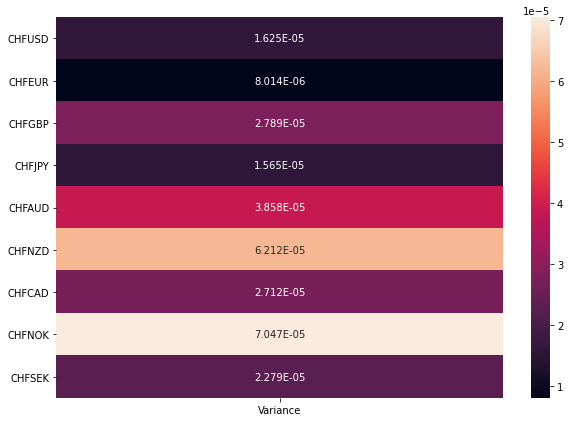

In [32]:
# Create a Heatmap and a table of the Variance values 
var_table=table.var()
var_table=pd.DataFrame(var_table)
var_table.columns=['Variance']
dfi.export(var_table, 'Variance.png')
plt.figure(figsize = (10,7))
sns.heatmap(var_table, annot=True,fmt='.3E')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.savefig("Heatmap_Variance.jpg")

In [33]:
var_table

,Variance
CHFUSD,0.000016
CHFEUR,0.000008
CHFGBP,0.000028
CHFJPY,0.000016
CHFAUD,0.000039
CHFNZD,0.000062
CHFCAD,0.000027
CHFNOK,0.000070
CHFSEK,0.000023


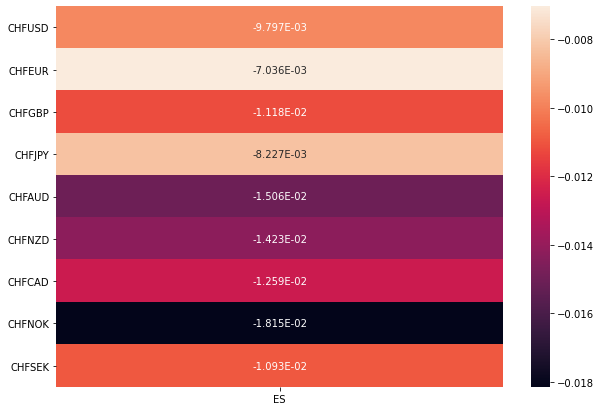

In [7]:
# Create a Heatmap of the ES values
es_table=calc.expected_shortfall(table, alpha=0.05)
es_table=es_table.transpose()
dfi.export(es_table, 'ES.png')
es_table.columns=['ES']
plt.figure(figsize = (10,7))
sns.heatmap(es_table, annot=True,fmt='.3E')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.savefig("Heatmap_ES.jpg")

In [8]:
es_table

,ES
CHFUSD,-0.009797
CHFEUR,-0.007036
CHFGBP,-0.011182
CHFJPY,-0.008227
CHFAUD,-0.015058
CHFNZD,-0.014231
CHFCAD,-0.012587
CHFNOK,-0.018147
CHFSEK,-0.010930


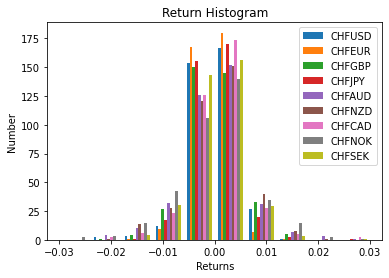

In [9]:
# Create a Histogram for all lognormal returns of the different Currencies 
table_hist=table.iloc[: ,1:]
plt.hist(table_hist,range=[-0.03,0.03])
plt.title('Return Histogram')
plt.xlabel('Returns') 
plt.ylabel('Number')  
plt.style.use('tableau-colorblind10')
plt.legend(table_hist.columns, loc ="upper right")
plt.savefig("Histogram_G10.jpg")

In [15]:
# create a table for different parameters 
table=table.iloc[:,1:]
mean=table.mean()
median=table.median()
std=table.std()
skewness=skew(table, axis=0)
kurtosis=kurtosis(table, axis=0)
param = pd.DataFrame(columns=table.columns,index=['Mean','Median','Std. dev.','Skewness','Kurtosis'])
param=param.transpose()
param['Mean']=mean
param['Median']=median
param['Std. dev.']=std
param['Skewness']=skewness
param['Kurtosis']=kurtosis
param=param.transpose()
dfi.export(param, 'different_parameters.png')

In [16]:
param

,CHFUSD,CHFEUR,CHFGBP,CHFJPY,CHFAUD,CHFNZD,CHFCAD,CHFNOK,CHFSEK
Mean,0.000228,0.000005,0.000142,0.000087,-0.000022,0.000294,0.000178,0.000184,-0.000106
Median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000055,0.000000,0.000000
Std. dev.,0.004031,0.002831,0.005281,0.003955,0.006211,0.007882,0.005208,0.008395,0.004774
Skewness,-0.668778,-0.103202,0.682845,0.687379,0.022817,5.047493,0.164912,0.841973,0.181355
Kurtosis,4.965501,9.437659,5.739862,5.317197,2.666667,60.679966,4.370734,7.713197,2.957841
